# ROC - AUC

Say we are discriminating cats vs dogs from images. Each image is represented by a vector $\vec{x}_i$ of pixels, and each value $y_i \in \{0, 1\}$ is correponds to a cat or a dog respectively. Next assume that we have trained a map $f(\vec{x}) = \alpha$, where $\alpha \in [0, 1]$. So

* if $\alpha \approx 0$ it is clearly a cat
* if $\alpha \approx 1$ it is clearly a dog
* if $\alpha \approx 0.5$ the classifier is undecided

The map then can be converted into a classifier $\hat{y}(T) = \alpha > T$, where $T$ is some threshold value.

Now assume we are only interested in whether the image is a cat or not. So finding a cat would be a "positive" outcome, and finding anything else (that is, a dog, in this case) would be "negative". Then

* $TP = \sum_i \bigl[(y_i, \hat{y}_i) = (0, 0) \bigr]$  - True Positives
* $FP = \sum_i \bigl[(y_i, \hat{y}_i) = (1, 0) \bigr]$  - False Positives
* $TN = \sum_i \bigl[(y_i, \hat{y}_i) = (1, 1) \bigr]$  - True Negatives
* $FN = \sum_i \bigl[(y_i, \hat{y}_i) = (0, 1) \bigr]$  - False Negatives

Statistics people define a few more values, which are

* $TPR = TP / P = TP / (TP + FN)$ - True Positive "Rate" - Out of all times when it was a cat, how many times did we guess it was a cat
* $FPR = FP / N = FP / (FP + TN)$ - False Positive "Rate" - Out of all times when it was a dog, how many times did we guess it was a cat

Now, the value of $T$ determines our strategy.

* For high $T$, we are more likely to call everything a cat. That increases TPR at the expense of increasing FPR
* For low $T$, we are more likely to call everything a dog. That decreases FPR at the expense of decreasing TPR

One can now plot TPR vs FPR as function of T. Diagonal are the expected values of blind guesses. Points in upper left triangle are better-than-random predictions, in the lower right are worse than random.

Now people also like to compute AUC - area under the curve. It is defined as

$$AUC = \int TPR(FPR) dFPR = \int TPR(T) FPR'(T) dT \approx \sum_i \frac{T_i + T_{i-1}}{2} (F_i - F_{i-1}) $$

Apparently, it is equivalent to Wilcoxon signed-rank test.

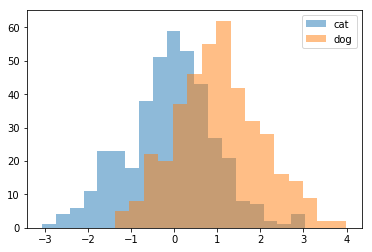

In [7]:
import numpy as np
import matplotlib.pyplot as plt

nSample = 400
alphaCAT = np.random.normal(0, 1, nSample)
alphaDOG = np.random.normal(1, 1, nSample)
plt.figure()
plt.hist(alphaCAT, bins='auto', label='cat', alpha=0.5)
plt.hist(alphaDOG, bins='auto', label='dog', alpha=0.5)
plt.legend()
plt.show()

In [19]:
num_tp = lambda y, alpha, T: np.sum((y == 0) & (alpha < T))
num_fp = lambda y, alpha, T: np.sum((y == 1) & (alpha < T))
num_tn = lambda y, alpha, T: np.sum((y == 1) & (alpha > T))
num_fn = lambda y, alpha, T: np.sum((y == 0) & (alpha > T))

def AUC(FPR, TPR, nDiscr):
    return 0.5 * np.sum([(TPR[i] + TPR[i-1])*(FPR[i] - FPR[i-1]) for i in range(1, nDiscr)])

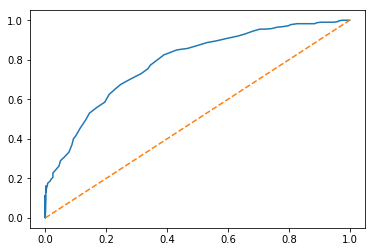

In [25]:
alphaALL = np.hstack([alphaCAT, alphaDOG])
yALL = np.array([0] * nSample + [1] * nSample)

Tmin = np.min(alphaALL)
Tmax = np.max(alphaALL)

nDiscr = 100
Tlist = np.linspace(Tmin, Tmax, nDiscr)

TPR = []
FPR = []
for T in Tlist:
    TP = num_tp(yALL, alphaALL, T)
    FP = num_fp(yALL, alphaALL, T)
    TN = num_tn(yALL, alphaALL, T)
    FN = num_fn(yALL, alphaALL, T)
    
    TPR += [TP / (TP + FN)]
    FPR += [FP / (FP + TN)]

fprSortIdx = np.argsort(FPR)
FPR = np.array(FPR)[fprSortIdx]
TPR = np.array(TPR)[fprSortIdx]
randROC = np.linspace(0, 1, nDiscr)

plt.figure()
plt.plot(FPR, TPR)
plt.plot(randROC, randROC, '--')
plt.show()

In [27]:
from scipy.stats import ranksums

print("The AUC for above distribution is", AUC(FPR, TPR, nDiscr))

print("The Wilcoxon Rank-Sum test is", ranksums(alphaCAT, alphaDOG))

The AUC for above distribution is 0.7855187499999999
The Wilcoxon Rank-Sum test is RanksumsResult(statistic=-14.016102380345599, pvalue=1.2425376943211496e-44)
